### LSE Data Analytics Online Career Accelerator

# DA201: Final Assignment - Diagnostic Analysis using Python

### **Use case Scenario**

You are part of a team of data analysts that was contracted by the National Health Services (NHS), a publicly funded healthcare system in England. The NHS incurs significant, potentially avoidable, costs when patients miss general practitioner (GP) appointments. The reasons for missed appointments need to be better understood as explained by The British Medical Association (BMA) chair Professor Philip Banfield:

"While it is frustrating when patients do not attend, the reasons why this happens should be investigated rather than simply resorting to punishing them. Financially penalising patients inevitably impact the poorest and most vulnerable in the community (GP Practice News 2022)."

Therefore, reducing or eliminating missed appointments would be beneficial financially as well as socially. The government needs a data-informed approach to deciding how best to handle this problem. At this stage of the project the two main questions posed by the NHS are:

Has there been adequate staff and capacity in the networks?
What was the actual utilisation of resources?

This analysis uses the `actual_duration.csv` - Details of appointments made by patients, `appointments_regional.csv`- Details on the type of appointments made by patients, `national_categories.xlsx`- Details of the national categories of appointments made by patients, `tweets.csv`- Data related to healthcare in the UK scraped from Twitter data sets and `metadata_nhs.txt`- Data related to healthcare in the UK scraped from Twitter.

The insights gained from the analysis will inform the NHS, Government & BMA for their decision-making so they can derive the next course of action(s)

## Prepare your workstation

In [421]:
# Import Matplotlib, Seaborn, NumPy, and Pandas.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [422]:
# Simple hacks to make plots look better: 

# Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)          

In [423]:
# Load the csv data using pd.read_csv for actual_duration and appointments_regional.
duration = pd.read_csv('actual_duration.csv')
appointments = pd.read_csv('appointments_regional.csv')

# Load the Excel using pd.read_excel for national_categories
categories = pd.read_excel('national_categories.xlsx')

# View the DataFrame of Duration.
# View the no. of rows and columns.
print(duration.shape)

# View the data types.
print(duration.dtypes)

# View the list of columns.
print(duration.columns)

# View the top 5 records.
duration.head()

# View the DataFrame for Appointments.
# View the no. of rows and columns.
print(appointments.shape)

# View the data types.
print(appointments.dtypes)

# View the list of columns.
print(appointments.columns)

# View the top 5 records.
appointments.head()

# View the DataFrame for Categories
# View the no. of rows and columns.
print(categories.shape)

# View the data types.
print(categories.dtypes)

# View the list of columns.
print(categories.columns)

# View the top 5 records.
categories.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [424]:
# Concat appointments, categories and duration DataFrames.
appointments_categories_duration = pd.concat([appointments, categories, duration])

# View the DataFrames
# # View the no. of rows and columns.
print(appointments_categories_duration.shape)

# View the data types.
print(appointments_categories_duration.dtypes)

# View the list of columns.
print(appointments_categories_duration.columns)

# View the top 5 records.
appointments_categories_duration.head()

(1552008, 16)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
appointment_date                     object
sub_icb_location_name                object
service_setting                      object
context_type                         object
national_category                    object
sub_icb_location_code                object
sub_icb_location_ons_code            object
region_ons_code                      object
actual_duration                      object
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments', 'appointment_date', 'sub_icb_location_name',
       'service_setting', 'context_type', 'nation

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,appointment_date,sub_icb_location_name,service_setting,context_type,national_category,sub_icb_location_code,sub_icb_location_ons_code,region_ons_code,actual_duration
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1: What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?

<AxesSubplot:>

Text(0.5, 1.0, 'Number of Appointments')

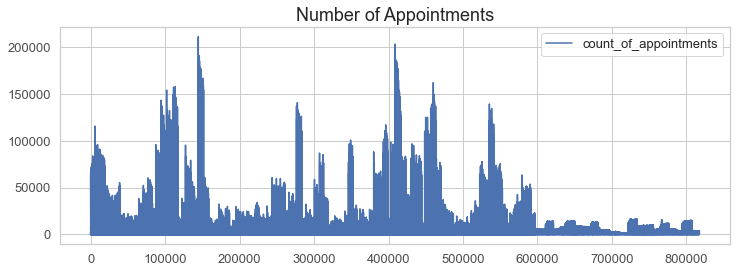

icb_ons_code                               0
appointment_month                     137793
appointment_status                    955187
hcp_type                              955187
appointment_mode                      955187
time_between_book_and_appointment     955187
count_of_appointments                      0
appointment_date                      596821
sub_icb_location_name                 596821
service_setting                       734614
context_type                          734614
national_category                     734614
sub_icb_location_code                1414215
sub_icb_location_ons_code            1414215
region_ons_code                      1414215
actual_duration                      1414215
dtype: int64

In [425]:
# Print the count or length of the number of locations, service settings,
# context types, national categories and appointment statuses

# Plot Number of Appointments as time series.
appointments_categories_duration.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Number of Appointments")
plt.show(block=False);

# Check for missing values.
appointments_categories_duration.isna().sum()

NHS North West London ICB - W2U3Z              14491
NHS Kent and Medway ICB - 91Q                  14121
NHS Devon ICB - 15N                            14009
NHS Hampshire and Isle Of Wight ICB - D9Y0V    13499
NHS North East London ICB - A3A8R              13321
                                               ...  
NHS Cheshire and Merseyside ICB - 01F           5313
NHS Lancashire and South Cumbria ICB - 02G      5278
NHS Cheshire and Merseyside ICB - 01V           4729
NHS Cheshire and Merseyside ICB - 01T           4301
NHS Greater Manchester ICB - 00V                3364
Name: sub_icb_location_name, Length: 106, dtype: int64


Text(0.5, 1.0, 'Count of number of locations')

<AxesSubplot:title={'center':'Count of number of locations'}, xlabel='sub_icb_location_name', ylabel='count'>

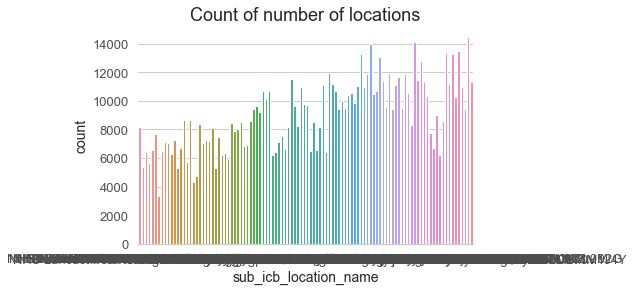

In [426]:
# Count the number of locations

print(appointments_categories_duration['sub_icb_location_name'].value_counts())

# Create a plot.
plt.title("Count of number of locations")

sns.despine(left=True);
sns.countplot(x='sub_icb_location_name', data=appointments_categories_duration)


#### Service Settings
The service setting describes the provision of care in which the appointment was delivered. 
There are four service settings. Where category data is not received, an appointment is 
assigned to an ‘Unmapped’ setting.

* Service Setting – Description
* General Practice – Appointments delivered by practice staff activity under the GMS/PMS/APMS contract.
* Primary Care Network
        - Appointments delivered by staff employed or engaged under the Additional Roles Reimbursement Scheme (ARRS). Appointments delivered in fulfilment of the service requirements of the Network Contract Directed Enhanced Service (DES) 
        – e.g. Structured Medication Reviews, weekly care home rounds 
        – with the exception of Extended Access services, for which the Extended Access Provision service setting should be used.
* Extended Access Provision – Appointments commissioned as part of extended access contractual arrangements.
* Other – Appointments delivered in the practice by another provider.
* Unmapped – No recorded category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped.

General Practice             359274
Primary Care Network         183790
Other                        138789
Extended Access Provision    108122
Unmapped                      27419
Name: service_setting, dtype: int64


Text(0.5, 1.0, 'Count of number of service settings')

<AxesSubplot:title={'center':'Count of number of service settings'}, xlabel='count', ylabel='service_setting'>

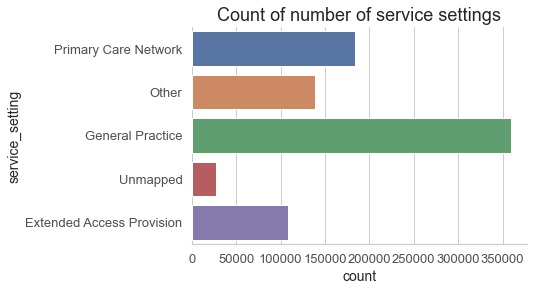

In [427]:
# Count the number of service settings

print(appointments_categories_duration['service_setting'].value_counts())

# Create a plot.
plt.title("Count of number of service settings")

sns.despine(left=True);
sns.countplot(y='service_setting', data=appointments_categories_duration)

#### Context Type
The National Categories are subdivided into three ‘Context Types’. The context describes 
whether an appointment is an encounter relating to direct patient care, or an activity 
undertaken as part of patient care where the patient is not involved. Where category data 
is not received, an appointment is assigned to an ‘Unmapped’ context type.

* Context Type – Description
* Care Related Encounter – Categories within this context type involve the patient and can be any modality, e.g. face-to-face appointments, telephone consultations, video and online consultations, home visits etc.
* Inconsistent Mapping – Appointment types that have been mapped but not to a Care Related Encounter are classed as Inconsistent Mapping. Appointments under this context type conflict with the description of an appointment. Work is ongoing to improve the consistency of mapping.
* Unmapped – No record of a category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped.

Care Related Encounter    700481
Inconsistent Mapping       89494
Unmapped                   27419
Name: context_type, dtype: int64


Text(0.5, 1.0, 'Count of number of context types')

<AxesSubplot:title={'center':'Count of number of context types'}, xlabel='context_type', ylabel='count'>

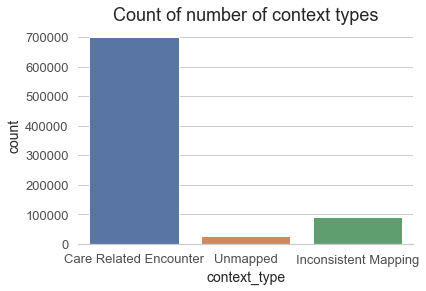

In [428]:
# Count the number of context types

print(appointments_categories_duration['context_type'].value_counts())

# Create a plot.
plt.title("Count of number of context types")

sns.despine(left=True);
sns.countplot(x='context_type', data=appointments_categories_duration)

#### National Categories
Within each context type, there is an option for practices to choose a ‘Does Not Fit’ category. 
This is used only when a practice is unable to place an appointment type within one of the 
predefined categories. These appointments are assigned to the ‘Inconsistent Mapping’ context 
type with further analysis planned to establish whether new categories in future releases are 
needed, or additional assistance and guidance is required for mapping.

* Context Type 
        – National Category
* Care Related Encounter 
        – General Consultation Acute
        – General Consultation Routine
        – Planned Clinics
        – Planned Clinical Procedure
        – Unplanned Clinical Activity
        – Walk-in, Clinical Triage, Home Visit, 	Care Home Visit
        – Group Consultation and Group Education
        – Structured Medication Review
        – Patient contact during Care Home Round
        – Care Home Needs Assessment & Personalised Care and Support Planning
        – Social Prescribing Service
        – Service provided by organisation external to the practice
        – Non-contractual chargeable work
* Inconsistent Mapping 
        – Care Related Encounter but does not fit into any other category
        – Appointment types not mapped to a Care Related Encounter

Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

Text(0.5, 1.0, 'Count of number of national categories')

<AxesSubplot:title={'center':'Count of number of national categories'}, xlabel='count', ylabel='national_category'>

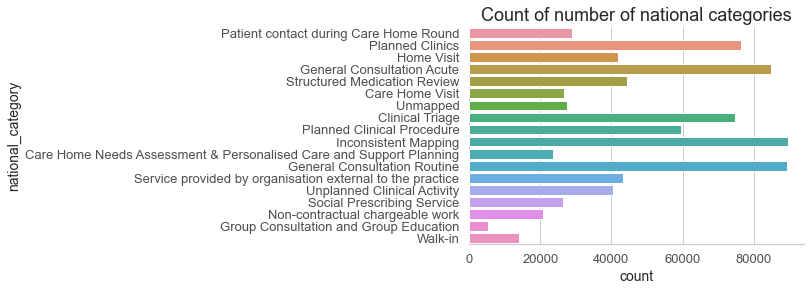

In [429]:
# Count the number of national categories

print(appointments_categories_duration['national_category'].value_counts())

# Create a plot.
plt.title("Count of number of national categories")

sns.despine(left=True);
sns.countplot(y='national_category', data=appointments_categories_duration)

#### Appointment Status
The appointment status shows whether the appointment is available, booked, has been 
attended by the patient (or not), or has been cancelled. This status changes over 
time, for example when a patient makes a booking, the appointment status changes 
from ‘Available’ to ‘Booked’. This release reports the final status of each 
appointment. 

In most cases, at the time of the appointment a ‘Booked’ status will be changed to 
either ‘Attended’ or ‘DNA’ (Did Not Attend). In some cases (3%–6% of monthly appointments), 
the final status of an appointment remains as ‘Booked’. It is not known from the data 
whether or not these appointments actually attended. For this reason, the status of these 
appointments is reported as 'Unknown'.

Due to an issue with the data collection, DNA appointments were not captured correctly 
after June 2018 and are under-reported until and including November 2018 for all 
practices using the TPP SystmOne system.

Attended    232137
Unknown     201324
DNA         163360
Name: appointment_status, dtype: int64


Text(0.5, 1.0, 'Count of number of appointment status')

<AxesSubplot:title={'center':'Count of number of appointment status'}, xlabel='appointment_status', ylabel='count'>

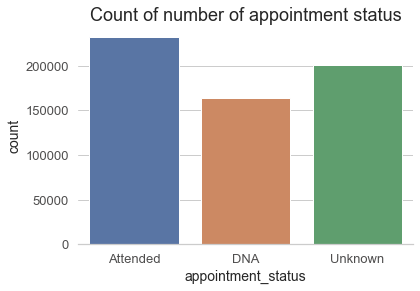

In [430]:
# Count the number of appointment statuses

print(appointments_categories_duration['appointment_status'].value_counts())

# Create a plot.
plt.title("Count of number of appointment status")

sns.despine(left=True);
sns.countplot(x='appointment_status', data=appointments_categories_duration)

## Question 2: What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?

In [431]:
# create a DataFrame of appointments_dates

appointment_dates = {"Appointments": [appointments_categories_duration['count_of_appointments'].value_counts()],
                         "Appointment_Date": [appointments_categories_duration['appointment_date'].value_counts()],
                         "Service_Setting": [appointments_categories_duration['service_setting'].value_counts()]}

appointment_dates['monthyear'] = pd.to_datetime(appointments_categories_duration['appointment_date']).dt.to_period('M')

by_month = appointment_dates['monthyear'].value_counts().sort_index()
df_month = by_month.rename_axis('Appointment_Date').reset_index(name='Service_Setting')

# Service settings reported the most appointments
df_month.sort_values('Service_Setting', ascending=False)


,Appointment_Date,Service_Setting
7,2022-03,104058
9,2022-05,97553
10,2022-06,93395
4,2021-12,92158
5,2022-01,91539
6,2022-02,90743
8,2022-04,89090
3,2021-11,77652
1,2021-09,74922
2,2021-10,74078


In [432]:
# Create a plot.

import plotly.express as px
import plotly.graph_objs as go

fig = go.Figure(data=go.Scatter(x=df_month['Appointment_Date'].astype(dtype=str), 
                        y=df_month['Service_Setting'],
                        marker_color='darkgreen', text=""))
fig.update_layout({"title": 'Max service settings per date range',
                   "xaxis": {"title":"Date Range"},
                   "yaxis": {"title":"Service Settings"},
                   "showlegend": False})


## Question 3: What is the number of appointments and records per month?

In [433]:
# Find the number of appointments and records per month
# Create a subset of DataFrame

appointments_per_month = {"Appointments": [appointments_categories_duration['count_of_appointments'].value_counts()],
                         "Month_Period": [appointments_categories_duration['appointment_month'].value_counts()]}

appointments_per_month['monthyear'] = pd.to_datetime(appointments_categories_duration['appointment_month']).dt.to_period('M')

by_month = appointments_per_month['monthyear'].value_counts().sort_index()
df_month = by_month.rename_axis('Month').reset_index(name='Appointments')
df_month


,Month,Appointments
0,2020-01,20889
1,2020-02,20689
2,2020-03,21350
3,2020-04,19124
4,2020-05,18338
5,2020-06,18844
6,2020-07,19502
7,2020-08,19247
8,2020-09,20043
9,2020-10,20122


In [434]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Bar(x=df_month['Month'].astype(dtype=str), 
                        y=df_month['Appointments'],
                        marker_color='indianred', text=""))
fig.update_layout({"title": 'Number of appointments and records per month',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total Appointments"},
                   "showlegend": False})

#fig.show()

## Question 4: What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?

In [435]:
# Number of appointments for service settings

# create a DataFrame of appointments_dates

appointment_dates = {"Appointments": [appointments_categories_duration['count_of_appointments'].value_counts()],
                         "Appointment_Month": [appointments_categories_duration['appointment_month'].value_counts()],
                         "Service_Setting": [appointments_categories_duration['service_setting'].value_counts()],
                        "Context_Type": [appointments_categories_duration['context_type'].value_counts()],
                        "National_Category": [appointments_categories_duration['national_category'].value_counts()]}

appointment_dates['monthyear'] = pd.to_datetime(appointments_categories_duration['appointment_month']).dt.to_period('M')

by_month = appointment_dates['monthyear'].value_counts().sort_index()
df_month = by_month.rename_axis('appointment_month').reset_index(name='Service_Setting')

# Service settings reported the most appointments
df_month.sort_values('Service_Setting', ascending=False)

,appointment_month,Service_Setting
26,2022-03,103354
22,2021-11,98418
28,2022-05,97701
20,2021-09,95363
21,2021-10,94640
29,2022-06,94399
23,2021-12,93044
24,2022-01,92121
25,2022-02,91902
27,2022-04,90085


In [436]:
# Create a trend plot
fig = go.Figure(data=go.Scatter(x=df_month['appointment_month'].astype(dtype=str), 
                        y=df_month['Service_Setting'],
                        marker_color='red', text=""))
fig.update_layout({"title": 'Trend for service settings per date range',
                   "xaxis": {"title":"Date Range"},
                   "yaxis": {"title":"Service Settings"},
                   "showlegend": False})


In [437]:
# Number of appointments for context types
# create a DataFrame of appointments_dates

appointment_dates = {"Appointments": [appointments_categories_duration['count_of_appointments'].value_counts()],
                         "Appointment_Date": [appointments_categories_duration['appointment_date'].value_counts()],
                         "Context_Type": [appointments_categories_duration['context_type'].value_counts()]}

appointment_dates['monthyear'] = pd.to_datetime(appointments_categories_duration['appointment_date']).dt.to_period('M')

by_month = appointment_dates['monthyear'].value_counts().sort_index()
df_month = by_month.rename_axis('appointment_date').reset_index(name='Context_Type')

# Context Type reported the most appointments
df_month.sort_values('Context_Type', ascending=False)

,appointment_date,Context_Type
7,2022-03,104058
9,2022-05,97553
10,2022-06,93395
4,2021-12,92158
5,2022-01,91539
6,2022-02,90743
8,2022-04,89090
3,2021-11,77652
1,2021-09,74922
2,2021-10,74078


In [438]:
# Create a trend plot
fig = go.Figure(data=go.Scatter(x=df_month['appointment_date'].astype(dtype=str), 
                        y=df_month['Context_Type'],
                        marker_color='blue', text=""))
fig.update_layout({"title": 'Trend for Context Type per date range',
                   "xaxis": {"title":"Date Range"},
                   "yaxis": {"title":"Context Type"},
                   "showlegend": False})

In [439]:
# Number of appointments for national categories
#national_categories = pd.read_excel('national_categories.xlsx')

df = pd.DataFrame({"Service_Setting": [categories['service_setting'].value_counts()],
                  "Context_Type": [categories['context_type'].value_counts()],
                  "National_Category": [categories['national_category'].value_counts()],
                  "Appointment_Month": [categories['appointment_month'].value_counts()],
                  "Count_Of_Appointments": [categories['count_of_appointments']]})

appointment_dates['monthyear'] = pd.to_datetime(categories['appointment_month']).dt.to_period('M')

by_month = appointment_dates['monthyear'].value_counts().sort_index()
df_month = by_month.rename_axis('Appointment_Month').reset_index(name='National_Category')

# Context Type reported the most appointments
df_month.sort_values('National_Category', ascending=False)

,Appointment_Month,National_Category
7,2022-03,82822
3,2021-11,77652
9,2022-05,77425
1,2021-09,74922
10,2022-06,74168
2,2021-10,74078
4,2021-12,72651
5,2022-01,71896
6,2022-02,71769
8,2022-04,70012


In [440]:
# Create a trend plot
fig = go.Figure(data=go.Scatter(x=df_month['Appointment_Month'].astype(dtype=str), 
                        y=df_month['National_Category'],
                        marker_color='green', text=""))
fig.update_layout({"title": 'Trend for National Category per Date Range',
                   "xaxis": {"title":"Date Range"},
                   "yaxis": {"title":"National Category"},
                   "showlegend": False})

## Question 5: What are the top trending hashtags (#) on Twitter related to healthcare in the UK?

### Using the Twitter API

In [441]:
# Copy the YAML file and your Twitter keys over to this Jupyter Notebook before you start to work.
import yaml
from yaml.loader import SafeLoader
from twitter import *

# Import the YAML file - remember to specify the whole path.
twitter_creds = yaml.safe_load(open('twitter.yaml', 'r').read())

# Pass your Twitter credentials.
twitter_api = Twitter(auth=OAuth(twitter_creds['access_token'],
                                 twitter_creds['access_token_secret'], 
                                 twitter_creds['api_key'],
                                 twitter_creds['api_secret_key'] ))

In [442]:
# See if you are connected.
print(twitter_api)

### Identify UK

In [443]:
# Determine worldwide trends.
trends_worldwide = twitter_api.trends.available()

# Find UK
our_country = 'United Kingdom'

# Create a variable.
united_kingdom = [_ for _ in trends_worldwide if _['name'] == our_country]

# Use index to find United Kingdom.
united_kingdom[0]

# List of where on earth identifier (woeid).
united_kingdom[0]['woeid']

{'name': 'United Kingdom',
 'placeType': {'code': 12, 'name': 'Country'},
 'url': 'http://where.yahooapis.com/v1/place/23424975',
 'parentid': 1,
 'country': 'United Kingdom',
 'woeid': 23424975,
 'countryCode': 'GB'}

23424975

### Common Trends

In [444]:
# Look at trends in United Kingdom.
united_kingdom_trends = twitter_api.trends.place(_id = united_kingdom[0]['woeid'])

# View the output.
united_kingdom_trends

[{'trends': [{'name': '#WorldBookDay',
    'url': 'http://twitter.com/search?q=%23WorldBookDay',
    'promoted_content': None,
    'query': '%23WorldBookDay',
    'tweet_volume': 42912},
   {'name': '#FMQs',
    'url': 'http://twitter.com/search?q=%23FMQs',
    'promoted_content': None,
    'query': '%23FMQs',
    'tweet_volume': None},
   {'name': 'McDonalds',
    'url': 'http://twitter.com/search?q=McDonalds',
    'promoted_content': None,
    'query': 'McDonalds',
    'tweet_volume': 28464},
   {'name': '#books',
    'url': 'http://twitter.com/search?q=%23books',
    'promoted_content': None,
    'query': '%23books',
    'tweet_volume': 16430},
   {'name': '#verymerewards',
    'url': 'http://twitter.com/search?q=%23verymerewards',
    'promoted_content': None,
    'query': '%23verymerewards',
    'tweet_volume': None},
   {'name': '#WBD23',
    'url': 'http://twitter.com/search?q=%23WBD23',
    'promoted_content': None,
    'query': '%23WBD23',
    'tweet_volume': None},
   {'name'

In [445]:
# Look at the output as a DataFrame.
# Import Pandas.
import pandas as pd

# Create a DataFrame.
united_kingdom_trends_pd = pd.DataFrame(united_kingdom_trends[0]['trends'])

# View a DataFrame.
united_kingdom_trends_pd

,name,url,promoted_content,query,tweet_volume
0,#WorldBookDay,http://twitter.com/search?q=%23WorldBookDay,None,%23WorldBookDay,42912.0
1,#FMQs,http://twitter.com/search?q=%23FMQs,None,%23FMQs,NaN
2,McDonalds,http://twitter.com/search?q=McDonalds,None,McDonalds,28464.0
3,#books,http://twitter.com/search?q=%23books,None,%23books,16430.0
4,#verymerewards,http://twitter.com/search?q=%23verymerewards,None,%23verymerewards,NaN
5,#WBD23,http://twitter.com/search?q=%23WBD23,None,%23WBD23,NaN
6,Hancock,http://twitter.com/search?q=Hancock,None,Hancock,107620.0
7,Lee Anderson,http://twitter.com/search?q=%22Lee+Anderson%22,None,%22Lee+Anderson%22,NaN
8,mnet,http://twitter.com/search?q=mnet,None,mnet,35645.0
9,Year 6,http://twitter.com/search?q=%22Year+6%22,None,%22Year+6%22,28767.0


In [446]:
# Narrow list down to 50,000 tweets.
united_kingdom_trends_over50k_pd = united_kingdom_trends_pd[united_kingdom_trends_pd['tweet_volume'] > 50000]\
.sort_values('tweet_volume', ascending=False)

# View the output.
print(united_kingdom_trends_over50k_pd.shape)
united_kingdom_trends_over50k_pd

(13, 5)


,name,url,promoted_content,query,tweet_volume
45,JHOPE,http://twitter.com/search?q=JHOPE,None,JHOPE,643888.0
11,WhatsApp,http://twitter.com/search?q=WhatsApp,None,WhatsApp,256201.0
24,Igbo,http://twitter.com/search?q=Igbo,None,Igbo,170193.0
26,JCOLE,http://twitter.com/search?q=JCOLE,None,JCOLE,146789.0
32,Yoruba,http://twitter.com/search?q=Yoruba,None,Yoruba,132636.0
6,Hancock,http://twitter.com/search?q=Hancock,None,Hancock,107620.0
33,Bunny,http://twitter.com/search?q=Bunny,None,Bunny,94447.0
25,Teachers,http://twitter.com/search?q=Teachers,None,Teachers,94439.0
43,Lagosians,http://twitter.com/search?q=Lagosians,None,Lagosians,78159.0
30,Telegraph,http://twitter.com/search?q=Telegraph,None,Telegraph,66818.0


In [447]:
# Save output as a CSV file.
united_kingdom_trends_over50k_pd.to_csv('united_kingdom_trends_over50k.csv', index=False)

In [448]:
# Search for a common trend(s).
healthcare_tweets = twitter_api.search.tweets(q='#healthcare')

# View the output.
print(healthcare_tweets)

{'statuses': [{'created_at': 'Thu Mar 02 13:39:42 +0000 2023', 'id': 1631288171345465347, 'id_str': '1631288171345465347', 'text': '#ECR2023👉Many thanks to Szymon Korzekwa  from BrainScanAI for his pitch 🙏 : \n\n“Support for emergency departments in… https://t.co/lBztbYfLvB', 'truncated': True, 'entities': {'hashtags': [{'text': 'ECR2023', 'indices': [0, 8]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/lBztbYfLvB', 'expanded_url': 'https://twitter.com/i/web/status/1631288171345465347', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 987079755634798593, 'id_str': '987079755634798593', 'name': 'Milvue', 'screen_name': '

In [449]:
# Read some tweets.
search_results = twitter_api.search.tweets(q=q, count=100)

statuses = search_results['statuses']

In [450]:
# Import JSON.
import json

for _ in range(5):
    print("Length of statuses", len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

print(json.dumps(statuses[1], indent=1))

Length of statuses 100
Length of statuses 200
Length of statuses 200
{
 "created_at": "Thu Mar 02 13:39:34 +0000 2023",
 "id": 1631288135953924097,
 "id_str": "1631288135953924097",
 "text": "RT @RupaSin44202771: https://t.co/kGk06130Dy\n\u0939\u093e\u0908 \u092c\u094d\u0932\u0921 \u092a\u094d\u0930\u0947\u0936\u0930 \u0915\u094b \u0939\u093e\u0907\u092a\u0930\u091f\u0947\u0902\u0936\u0928 \u092d\u0940 \u0915\u0939\u093e \u091c\u093e\u0924\u093e \u0939\u0948\u0964 \u0939\u093e\u0908 \u092c\u094d\u0932\u0921\u092a\u094d\u0930\u0947\u0936\u0930 \u0906\u091c\u0915\u0932 \u0906\u092e \u0938\u092e\u0938\u094d\u092f\u093e \u092c\u0928\u0924\u0940 \u091c\u093e \u0930\u0939\u0940 \u0939\u0948\u0964\u0939\u093f\u0902\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "RupaSin44202771",
    "name": "Rupa Oos ki ek Boond",
    "id": 1335574739746635777,
    "id_str": "1335574739746635777",
    "indices": [
     3,
     19
  

In [451]:
# Check statuses.
t = statuses[0]

# Print the keys.
t.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [452]:
# Find the id.
print(t['id'])

# View the ouput in text.
print(t['text'])

# View entities.
t['entities']

1631288171345465347
#ECR2023👉Many thanks to Szymon Korzekwa  from BrainScanAI for his pitch 🙏 : 

“Support for emergency departments in… https://t.co/lBztbYfLvB


{'hashtags': [{'text': 'ECR2023', 'indices': [0, 8]}],
 'symbols': [],
 'user_mentions': [],
 'urls': [{'url': 'https://t.co/lBztbYfLvB',
   'expanded_url': 'https://twitter.com/i/web/status/1631288171345465347',
   'display_url': 'twitter.com/i/web/status/1…',
   'indices': [117, 140]}]}

## Using the tweets.csv

In [453]:
# Read the tweets.csv file.
tweets = pd.read_csv('tweets.csv')

# View the Rows and Columns.
print(tweets.shape)

# View the data types.
print(tweets.dtypes)

# View the columns
print(tweets.columns)

# Fetch top 5 rows
tweets

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,As Arkansas’ first Comprehensive Stroke Certif...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the...,"{'hashtags': [{'text': 'PremiseHealth', 'indic...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 're...",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long w...,"{'hashtags': [{'text': 'Healthcare', 'indices'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 're...",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...,"{'hashtags': [{'text': 'NEW', 'indices': [20, ...",#NEW,"{'iso_language_code': 'en', 'result_type': 're...",5,0,False,False,en
4,1567582720460570625,ICYMI: Our recent blogs on Cybersecurity in Ac...,"{'hashtags': [{'text': 'blogs', 'indices': [18...","#blogs, #digitaltransformation, #cybersecurity...","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
...,...,...,...,...,...,...,...,...,...,...
1169,1567583004209332227,RT @PotomacPhotonic: Potomac #Innovation Repor...,"{'hashtags': [{'text': 'Innovation', 'indices'...","#Innovation, #precisionFabrication, #Microfluidic","{'iso_language_code': 'en', 'result_type': 're...",1,0,False,False,en
1170,1567582945342267393,Not a cent towards workers who would like to a...,"{'hashtags': [{'text': 'SKPoli', 'indices': [2...","#SKPoli, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,1,False,False,en
1171,1567582936014241792,"The @hfmaorg Region 9 presents ""The Value of E...","{'hashtags': [{'text': 'webinar', 'indices': [...","#webinar, #ESG, #healthcare","{'iso_language_code': 'en', 'result_type': 're...",0,0,False,False,en
1172,1567582892892782592,Happy physiotherapy 🩺 day 🎉..\r\n#bpt #physiot...,"{'hashtags': [{'text': 'bpt', 'indices': [30, ...","#bpt, #physiotherapy, #HealthyNation, #healthc...","{'iso_language_code': 'en', 'result_type': 're...",0,5,False,False,en


## Question 6: Were there adequate staff and capacity in the networks?

Healthcare professional type (HCP type) was incorrectly extracted for some practices from 
October 2017 onwards. This has led to potential incorrect reporting of some HCP Types, 
including nurses. The only HCP type currently collected with high enough consistency for 
publication is GP. Therefore, all other HCP types are reported as 'Other Practice Staff' 
throughout this release.

Blank or missing HCP types are due to the use of generic lists for GPs (for example visits and 
prescription requests) or staff not set up correctly on the system (for example medical 
students and team leaders).

Where HCP type is included, it has been grouped in the following way.
The occupations grouped as HCP type 'GP' are:
* GP registrar
* Locum GP
* Principal GP

The occupations grouped as HCP type 'Other Practice Staff' are:
* Acupuncturist
* Chiropodist
* Community Psychiatric Nurse
* Counsellor
* Dispenser
* District Nurse
* Health Visitor
* Interpreter/Link Worker
* Osteopath
* Other Practice Staff
* Physiotherapist
* Practice Nurse

If HCP type is recorded as NULL/Missing Data, it will be classified as Unknown. It is possible 
that a small proportion of GP appointments are classified within Other Practice Staff due to 
incorrect mappings with data suppliers, for example, Trainee GP or GP Partner. For information 
on how this differs from SDS Role Group go to the SDS Role Group section.

Other Practice staff    241557
GP                      226036
Unknown                 129228
Name: hcp_type, dtype: int64


Text(0.5, 1.0, 'Count of number of HCP Type')

<AxesSubplot:title={'center':'Count of number of HCP Type'}, xlabel='hcp_type', ylabel='count'>

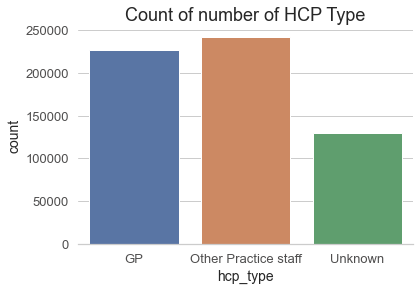

In [454]:
# Determine the HCP (Healthcare Professional Type)
# Correct types: GP registrar, Locum GP, Principal GP
# Incorrect types: Other Practice staff apart from GP
# NULL/Missing data: Unknown

# Count the number of HCP types

print(appointments_categories_duration['hcp_type'].value_counts())

# Create a plot.
plt.title("Count of number of HCP Type")

sns.despine(left=True);
sns.countplot(x='hcp_type', data=appointments_categories_duration)

## Question 7: What was the actual utilisation of resources?

#### Check for the Appointment Mode, Actual Duration of the appointment, National Category and Time from booking to appointment

#### 1. Appointment Mode
The mode of the appointment shows the setting of the consultation. For example, face to face, 
telephone, or home visits. This is set locally by the practices so it may not represent the actual 
care setting of the appointment. For example, some video conference appointments may be logged 
by the practice as face to face.

Most face to face time is booked as individual appointment time, typically with one patient 
attending each time slot. By contrast, many telephone triage and home visits appear as one 
long blocked period and are not booked (e.g. traige and home visits) to individual patients.

Some home visits and telephone triage sessions are booked in to early-morning sessions 
(6 am to 6:20 am) for each GP as untimed appointments, but the consultations happen in the 
afternoon. They are booked in to early-morning sessions so that they appear on the top of the 
appointment book screen for each GP. At some practices, home visits are logged at reception 
and not in the practice system.

Unless home visits and telephone triage are logged as individual appointments and booked to 
a patient, they will not appear in this publication. Appointments marked as online, video or 
video conference are shown as 'Online / Video'. This may or may not include a video element. 
Non-video based online consultations such as live chat or Voice over Internet Protocol (VoIP) 
and video-based appointments are all included in this category.

Practices using the Cegedim GP system are unable to supply appointment mode data. Consequently, 
the proportion of appointments with an 'Unknown' appointment mode is higher in releases from 
July 2019 onwards when Cegedim practices were included in the publication.

Face-to-Face    180410
Telephone       166483
Home Visit      111194
Unknown          79147
Video/Online     59587
Name: appointment_mode, dtype: int64


Text(0.5, 1.0, 'Count the number of Appointment Mode availed')

<AxesSubplot:title={'center':'Count the number of Appointment Mode availed'}, xlabel='count', ylabel='appointment_mode'>

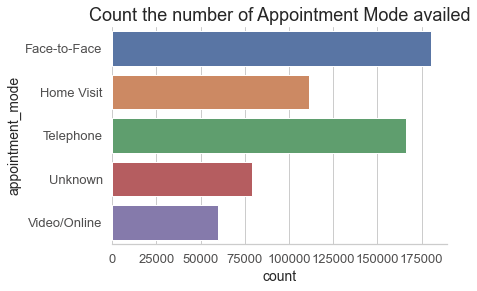

In [455]:
# Appointment Mode: Cegedim GP system {Unknown}

print(appointments_categories_duration['appointment_mode'].value_counts())

# Create a plot.
plt.title("Count the number of Appointment Mode availed")

sns.despine(left=True);
sns.countplot(y='appointment_mode', data=appointments_categories_duration)

#### 2. Actual Duration
Actual duration data was first included in the April 2022 release with data from 
December 2021. Actual duration is the length in minutes of the consultation that
took place.

This field is recorded differently depending on the practice’s system supplier. 
For example, EMIS records the actual duration as the time between the patient being 
called into their appointment and the time the clinician records that the consultation 
is complete. TPP can record the start time as either when the consultation is started, 
when a clinician calls for a patient, or when the appointment status is changed to 
‘in progress’. The end time is recorded as when the appointment is marked as finished 
with the actual duration being the difference between these two times. This leads to 
variations in data quality that NHS Digital is continuing to work with system suppliers 
to address.

Any appointments with a null duration or a duration of less than one minute or greater 
than 60 minutes have been grouped into an ‘Unknown / Data Quality Issue’ category within 
this publication.

Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: actual_duration, dtype: int64


Text(0.5, 1.0, 'Count the number of Appointment(s) duration')

<AxesSubplot:title={'center':'Count the number of Appointment(s) duration'}, xlabel='count', ylabel='actual_duration'>

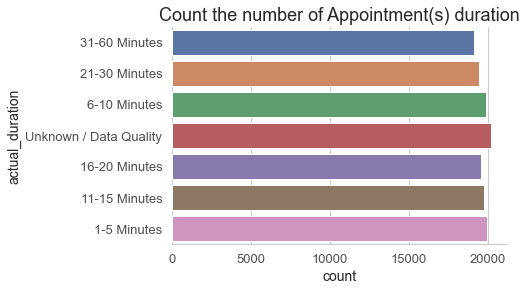

In [456]:
# Actual Duration - Null duration or <1min or >60-mins categorized as Unknown/Data Quality Issue
print(appointments_categories_duration['actual_duration'].value_counts())

# Create a plot.
plt.title("Count the number of Appointment(s) duration")

sns.despine(left=True);
sns.countplot(y='actual_duration', data=appointments_categories_duration)

#### 3. National Category
Within each context type, there is an option for practices to choose a ‘Does Not Fit’ category. 
This is used only when a practice is unable to place an appointment type within one of the 
predefined categories. These appointments are assigned to the ‘Inconsistent Mapping’ context 
type with further analysis planned to establish whether new categories in future releases are 
needed, or additional assistance and guidance is required for mapping.

* Context Type 
        – National Category
* Care Related Encounter 
        – General Consultation Acute
        – General Consultation Routine
        – Planned Clinics
        – Planned Clinical Procedure
        – Unplanned Clinical Activity
        – Walk-in, Clinical Triage, Home Visit, Care Home Visit
        – Group Consultation and Group Education
        – Structured Medication Review
        – Patient contact during Care Home Round
        – Care Home Needs Assessment & Personalised Care and Support Planning
        – Social Prescribing Service
        – Service provided by organisation external to the practice
        – Non-contractual chargeable work
* Inconsistent Mapping 
        – Care Related Encounter but does not fit into any other category
        – Appointment types not mapped to a Care Related Encounter

Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                                        26644

Text(0.5, 1.0, 'Count the number of Appointment(s) as per National Category')

<AxesSubplot:title={'center':'Count the number of Appointment(s) as per National Category'}, xlabel='count', ylabel='national_category'>

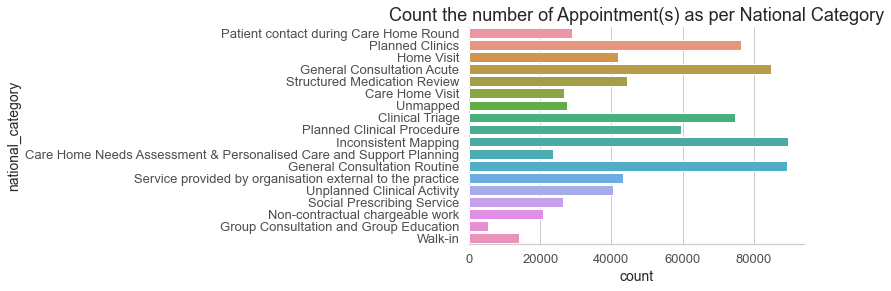

In [457]:
# Check for National Category and look for Inconsistent Mapping - 'Does Not Fit'

print(appointments_categories_duration['national_category'].value_counts())

# Create a plot.
plt.title("Count the number of Appointment(s) as per National Category")

sns.despine(left=True);
sns.countplot(y='national_category', data=appointments_categories_duration)

#### 4. Time from booking to appointment
Time elapsed from when the booking was made to when the appointment happened is presented in 
this release. There are several factors that drive this variable, including:
* appointment availability at the practice
* patient availability
* urgency of the appointment
* GP advice
* regular/repeat appointments that may be booked in advance

Same Day                  95502
2 to 7 Days               92409
1 Day                     88957
8  to 14 Days             82698
15  to 21 Days            73666
22  to 28 Days            68755
More than 28 Days         65147
Unknown / Data Quality    29687
Name: time_between_book_and_appointment, dtype: int64


Text(0.5, 1.0, 'Count the time from booking to appointment')

<AxesSubplot:title={'center':'Count the time from booking to appointment'}, xlabel='count', ylabel='time_between_book_and_appointment'>

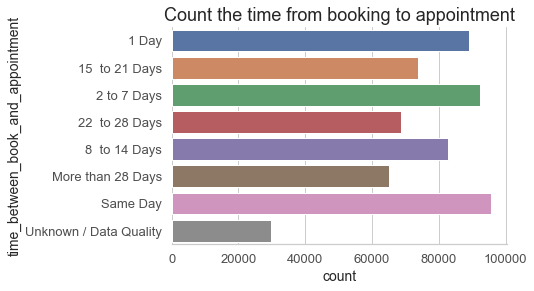

In [458]:
# Time from booking to appointment

print(appointments_categories_duration['time_between_book_and_appointment'].value_counts())

# Create a plot.
plt.title("Count the time from booking to appointment")

sns.despine(left=True);
sns.countplot(y='time_between_book_and_appointment', data=appointments_categories_duration)

## Question 8: What possible recommendations does the data provide for the NHS?

#### 1. Count on Number of Locations: 

        NHS North West London ICB - W2U3Z              14491
        NHS Kent and Medway ICB - 91Q                  14121
        NHS Devon ICB - 15N                            14009
        NHS Hampshire and Isle Of Wight ICB - D9Y0V    13499
        NHS North East London ICB - A3A8R              13321

#### 2. Service Setting: The service setting describes the provision of care in which the appointment was delivered. 
    A) 27419 appointments were assigned to an ‘Unmapped’ setting, since the category data is not received.
    B) Additional cost to NHS due to Primary Care Network (183790), Extended Access Provision(108122), Other (138789) as they are delivered via various schemes (ARRS, DES, Commissions, Practice by another provider etc.)

#### 3. Context Type:
    A) There are around 89494 "Inconsistent Mapping" and 27419 are "Unmapped" which needs to be improved/reviewed for the consistency of the mapping

#### 4. National Categories:
    A) Here there is a significant number of "Inconsisten Mapping" 89494 which is due to "Does Not Fit" category. This is used only when a practice is unable to place an appointment type within one of the predefined categories.

#### 5. Appointment Status:
    A) There is a significant number of DNA (Did Not Attend): 163360 and Unknown: 201324; totaling to: 364,684; which is higher than the Attended number: 232,137

#### 6. 2022/March reported highest number of appointments delivered: 104058

#### 7. HCP (Healthcare Professional Type): Higher number of Non-GP and Unknown category staff delivered healthcare support around 370,785 v/s actual GP's (226,036)!
    GP: 226036
    Unknown: 129228
    Non-GP (Other Practice staff): 241557
        Acupuncturist
        Chiropodist
        Community Psychiatric Nurse
        Counsellor
        Dispenser
        District Nurse
        Health Visitor
        Interpreter/Link Worker
        Osteopath
        Other Practice Staff
        Physiotherapist
        Practice Nurse

#### 8. Appointment mode:
    Face-to-Face    180410
    Telephone       166483
    Home Visit      111194
    Unknown          79147
    Video/Online     59587

#### 9. Actual Duration (Consultation): 
    Unknown / Data Quality    20161 (<1-min or >60-min)
    1-5 Minutes               19909
    6-10 Minutes              19902
    11-15 Minutes             19738
    16-20 Minutes             19534
    21-30 Minutes             19452
    31-60 Minutes             19097

#### 10. Time from booking to appointment:
    Same Day                  95502
    2 to 7 Days               92409
    1 Day                     88957
    8  to 14 Days             82698
    15  to 21 Days            73666
    22  to 28 Days            68755
    More than 28 Days         65147
    Unknown / Data Quality    29687


### Summary

The reason for patient’s missing/No-show on GP appointments are due to multiple factors:
* Lack of availability of actual GP’s
* Healthcare support are actually provided by Non-GP Health Professionals like 
    Acupuncturist
    Chiropodist
    Community Psychiatric Nurse
    Counsellor
    Dispenser
    District Nurse
    Health Visitor
    Interpreter/Link Worker
    Osteopath
    Other Practice Staff
    Physiotherapist
    Practice Nurse

* Patients have a long wait time for the appointment from the time of booking
* Consultations are of shorter duration
* Appointment mode is not 100% Face-to-Face
* One of the main reason is due to the COVID-19 (pandemic), patients were not willing to go to the hospitals in-person from Jan-2020 until end of 2022 and were resorting to more of virtual-based consultation over Face-to-Face consultation
* NHS is incurring more cost due to Extended Access Provision, delivered via various schemes like ARRS, DES, Commissions, Practices by other providers etc. which are all added cost